In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Exportación de excel a csv 

In [15]:
# Convertir el archivo de consumo.xlsx a CSV
consumo_df = pd.read_excel('consumo.xlsx')
consumo_df.to_csv('consumo.csv', index=False)

# Convertir el archivo de importacion.xlsx a CSV
importacion_df = pd.read_excel('importacion.xlsx')
importacion_df.to_csv('importacion.csv', index=False)

#haz un csv para cada hoja del excel de precios 
precios_df = pd.read_excel('precios.xlsx', sheet_name=None)

#unir las 4 hojas de precios en un solo dataframe
precios_df = pd.concat(precios_df.values())
precios_df.to_csv('precios.csv', index=False)



print("Archivos CSV creados y limpiados exitosamente.")


Archivos CSV creados y limpiados exitosamente.


# Análisis Exploratorio 

In [16]:
# Filtrar columnas relevantes en consumo y importacion
consumo_filtered = consumo_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importacion_filtered = importacion_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
precios_filtered = precios_df[['FECHA', 'SUPERIOR GTQ/GALON', 'REGULAR GTQ/GALON', 'DIESEL GTQ/GALON', 'GTQ/CIL 25 LB']]

# Renombrar columnas para consistencia
precios_filtered.columns = ['Fecha', 'Gasolina superior', 'Gasolina regular', 'Diesel', 'Gas licuado']

In [17]:
# Convertir a formato datetime
consumo_filtered['Fecha'] = pd.to_datetime(consumo_filtered['Fecha'])
importacion_filtered['Fecha'] = pd.to_datetime(importacion_filtered['Fecha'])
precios_filtered['Fecha'] = pd.to_datetime(precios_filtered['Fecha'])

C:\Users\jsken\AppData\Local\Temp\ipykernel_25832\2397928179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_filtered['Fecha'] = pd.to_datetime(consumo_filtered['Fecha'])
C:\Users\jsken\AppData\Local\Temp\ipykernel_25832\2397928179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importacion_filtered['Fecha'] = pd.to_datetime(importacion_filtered['Fecha'])
C:\Users\jsken\AppData\Local\Temp\ipykernel_25832\2397928179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [21]:
importacion_filtered

,Fecha,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
0,2001-01-01,177776.50,373963.96,0.00,194065.738095
1,2001-02-01,123115.99,243091.07,0.00,170703.380952
2,2001-03-01,161726.42,312084.38,0.00,161837.371429
3,2001-04-01,127338.74,285054.89,0.00,163048.642857
4,2001-05-01,168730.19,300913.67,0.00,171518.861905
...,...,...,...,...,...
277,2024-02-01,740662.25,650360.11,1236861.75,916541.700000
278,2024-03-01,838270.93,620077.74,1477038.00,675157.480000
279,2024-04-01,886132.77,687017.96,1294706.12,473940.660000
280,2024-05-01,939656.18,696970.30,1470870.09,684864.460000


In [18]:
# Estadísticas descriptivas
print(consumo_filtered.describe())
print(importacion_filtered.describe())
print(precios_filtered.describe())


                               Fecha  Gasolina regular  Gasolina superior  \
count                            294        294.000000         294.000000   
mean   2012-03-16 18:31:50.204081664     387877.634195      465123.002533   
min              2000-01-01 00:00:00     160741.900000      300242.781667   
25%              2006-02-08 00:00:00     214627.297917      382240.402500   
50%              2012-03-16 12:00:00     285343.705000      420304.655000   
75%              2018-04-23 12:00:00     526295.330000      568316.002500   
max              2024-06-01 00:00:00     894533.140000      768102.830000   
std                              NaN     210531.898078      108590.648175   

       Diesel bajo azufre  Gas licuado de petróleo  
count        2.940000e+02               294.000000  
mean         3.043604e+05            313069.932133  
min          0.000000e+00            167818.137897  
25%          0.000000e+00            225904.582202  
50%          0.000000e+00            2626

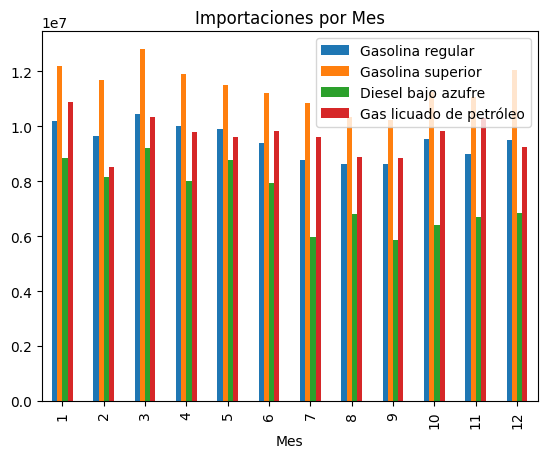

In [24]:
# Excluir las columnas no numéricas antes de la agrupación
importacion_filtered_numeric = importacion_filtered.select_dtypes(include='number')

# Agregar nuevamente las columnas 'Fecha', 'Mes' y 'Año'
importacion_filtered_numeric['Mes'] = importacion_filtered['Mes']
importacion_filtered_numeric['Año'] = importacion_filtered['Año']

# Agrupar por mes y sumar las importaciones (solo columnas numéricas)
importaciones_por_mes = importacion_filtered_numeric.groupby('Mes').sum()

# Visualizar
importaciones_por_mes[['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']].plot(kind='bar')
plt.title('Importaciones por Mes')
plt.show()

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

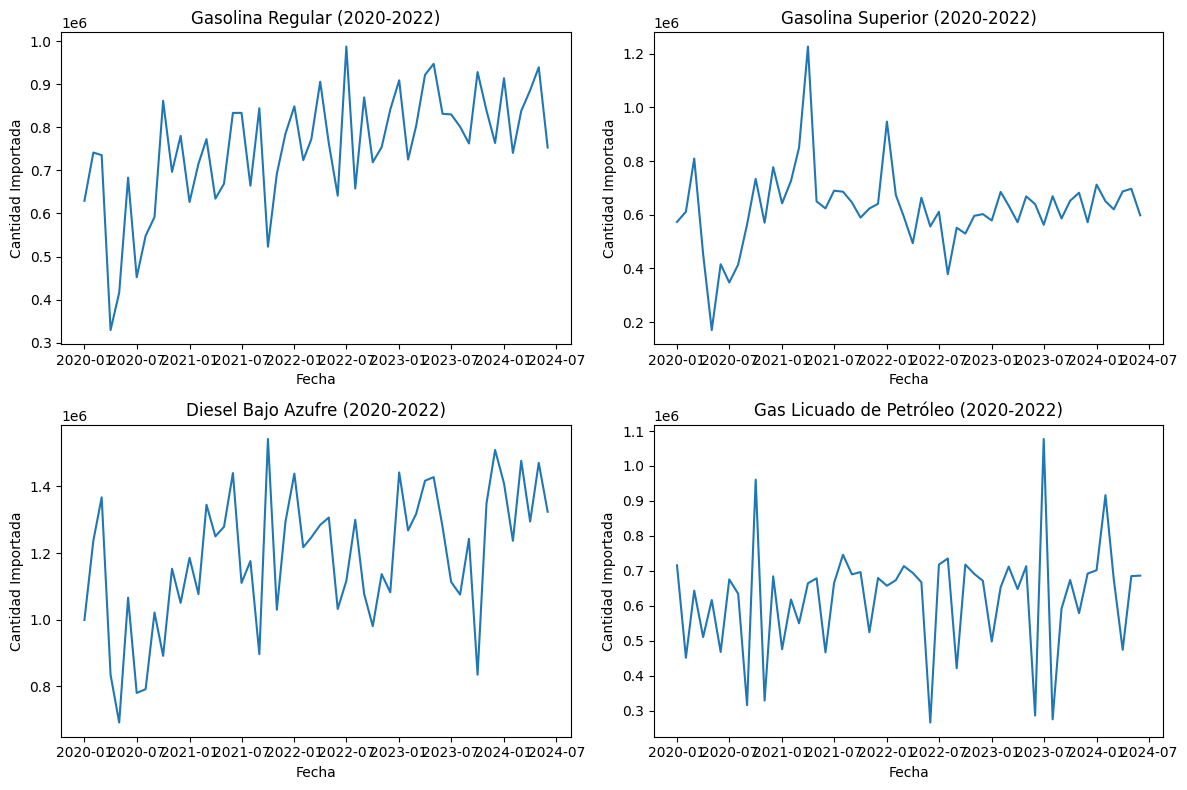

In [28]:
# Filtrar datos de la pandemia (2020-2022)
importacion_filtered_pandemia = importacion_filtered[importacion_filtered['Fecha'].dt.year >= 2020]

# Crear el gráfico de líneas para cada tipo de combustible por separado
plt.figure(figsize=(12, 8))

# Gráfico para Gasolina Regular
plt.subplot(2, 2, 1)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Gasolina regular')
plt.title('Gasolina Regular (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Gráfico para Gasolina Superior
plt.subplot(2, 2, 2)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Gasolina superior')
plt.title('Gasolina Superior (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Gráfico para Diesel Bajo Azufre
plt.subplot(2, 2, 3)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Diesel bajo azufre')
plt.title('Diesel Bajo Azufre (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Gráfico para Gas Licuado de Petróleo
plt.subplot(2, 2, 4)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Gas licuado de petróleo')
plt.title('Gas Licuado de Petróleo (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

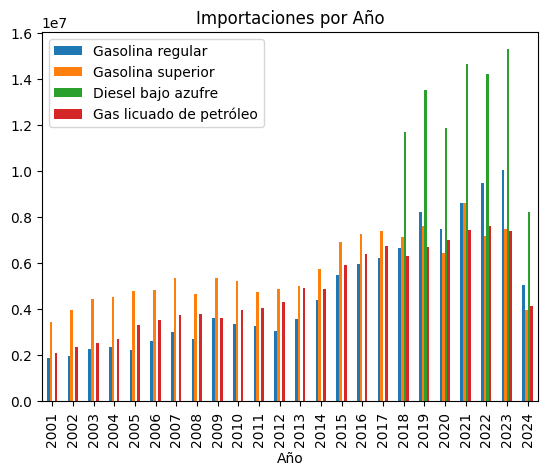

In [29]:
#agrupar or año y sumar las importaciones 
importaciones_por_año = importacion_filtered_numeric.groupby('Año').sum()
importaciones_por_año[['Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']].plot(kind='bar')
plt.title('Importaciones por Año')
plt.show()


In [32]:
#evaluar la normalidad de las distribuciones 
from scipy.stats import shapiro


print("Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los combustibles en dataset de importacion:")
# Test de Shapiro-Wilk para Gasolina Regular
stat, p = shapiro(importacion_filtered['Gasolina regular'])
print('Gasolina Regular:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gasolina Superior
stat, p = shapiro(importacion_filtered['Gasolina superior'])
print('Gasolina Superior:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Diesel Bajo Azufre
stat, p = shapiro(importacion_filtered['Diesel bajo azufre'])
print('Diesel Bajo Azufre:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gas Licuado de Petróleo
stat, p = shapiro(importacion_filtered['Gas licuado de petróleo'])
print('Gas Licuado de Petróleo:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

    


Gasolina Regular: stat=0.903, p=0.000
La muestra no parece provenir de una distribución normal
Gasolina Superior: stat=0.972, p=0.000
La muestra no parece provenir de una distribución normal
Diesel Bajo Azufre: stat=0.614, p=0.000
La muestra no parece provenir de una distribución normal
Gas Licuado de Petróleo: stat=0.957, p=0.000
La muestra no parece provenir de una distribución normal


In [33]:
#test de normalidad para los precios

print("Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los precios en dataset de precios:")

# Test de Shapiro-Wilk para Gasolina Regular
stat, p = shapiro(precios_filtered['Gasolina regular'])
print('Gasolina Regular:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gasolina Superior
stat, p = shapiro(precios_filtered['Gasolina superior'])
print('Gasolina Superior:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')

else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Diesel
stat, p = shapiro(precios_filtered['Diesel'])
print('Diesel:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gas Licuado
stat, p = shapiro(precios_filtered['Gas licuado'])
print('Gas Licuado:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')
    

Gasolina Regular: stat=0.990, p=0.000
La muestra no parece provenir de una distribución normal
Gasolina Superior: stat=0.991, p=0.000
La muestra no parece provenir de una distribución normal
Diesel: stat=0.988, p=0.000
La muestra no parece provenir de una distribución normal
Gas Licuado: stat=0.898, p=0.000
La muestra no parece provenir de una distribución normal


In [34]:
#test de normalidad para consumo 

print("Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los consumos en dataset de consumo:")
# Test de Shapiro-Wilk para Gasolina Regular
stat, p = shapiro(consumo_filtered['Gasolina regular'])
print('Gasolina Regular:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gasolina Superior
stat, p = shapiro(consumo_filtered['Gasolina superior'])
print('Gasolina Superior:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Diesel Bajo Azufre
stat, p = shapiro(consumo_filtered['Diesel bajo azufre'])
print('Diesel Bajo Azufre:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gas Licuado de Petróleo
stat, p = shapiro(consumo_filtered['Gas licuado de petróleo'])
print('Gas Licuado de Petróleo:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

    

Gasolina Regular: stat=0.843, p=0.000
La muestra no parece provenir de una distribución normal
Gasolina Superior: stat=0.911, p=0.000
La muestra no parece provenir de una distribución normal
Diesel Bajo Azufre: stat=0.592, p=0.000
La muestra no parece provenir de una distribución normal
Gas Licuado de Petróleo: stat=0.883, p=0.000
La muestra no parece provenir de una distribución normal
